In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the training data
train_data = pd.read_csv('internship_train.csv')
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
# Checking training data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

After checking the training data info, we can see that we have 54 numeric non-null columns, so we don't have missing data.

In [4]:
# Checking for duplicates in training data
train_data[train_data.duplicated(keep = False)]

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target


Also, we don't have duplicates in the training data.

In [5]:
# Training data statistics
train_data_stats = train_data.describe()
train_data_stats

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


<AxesSubplot:>

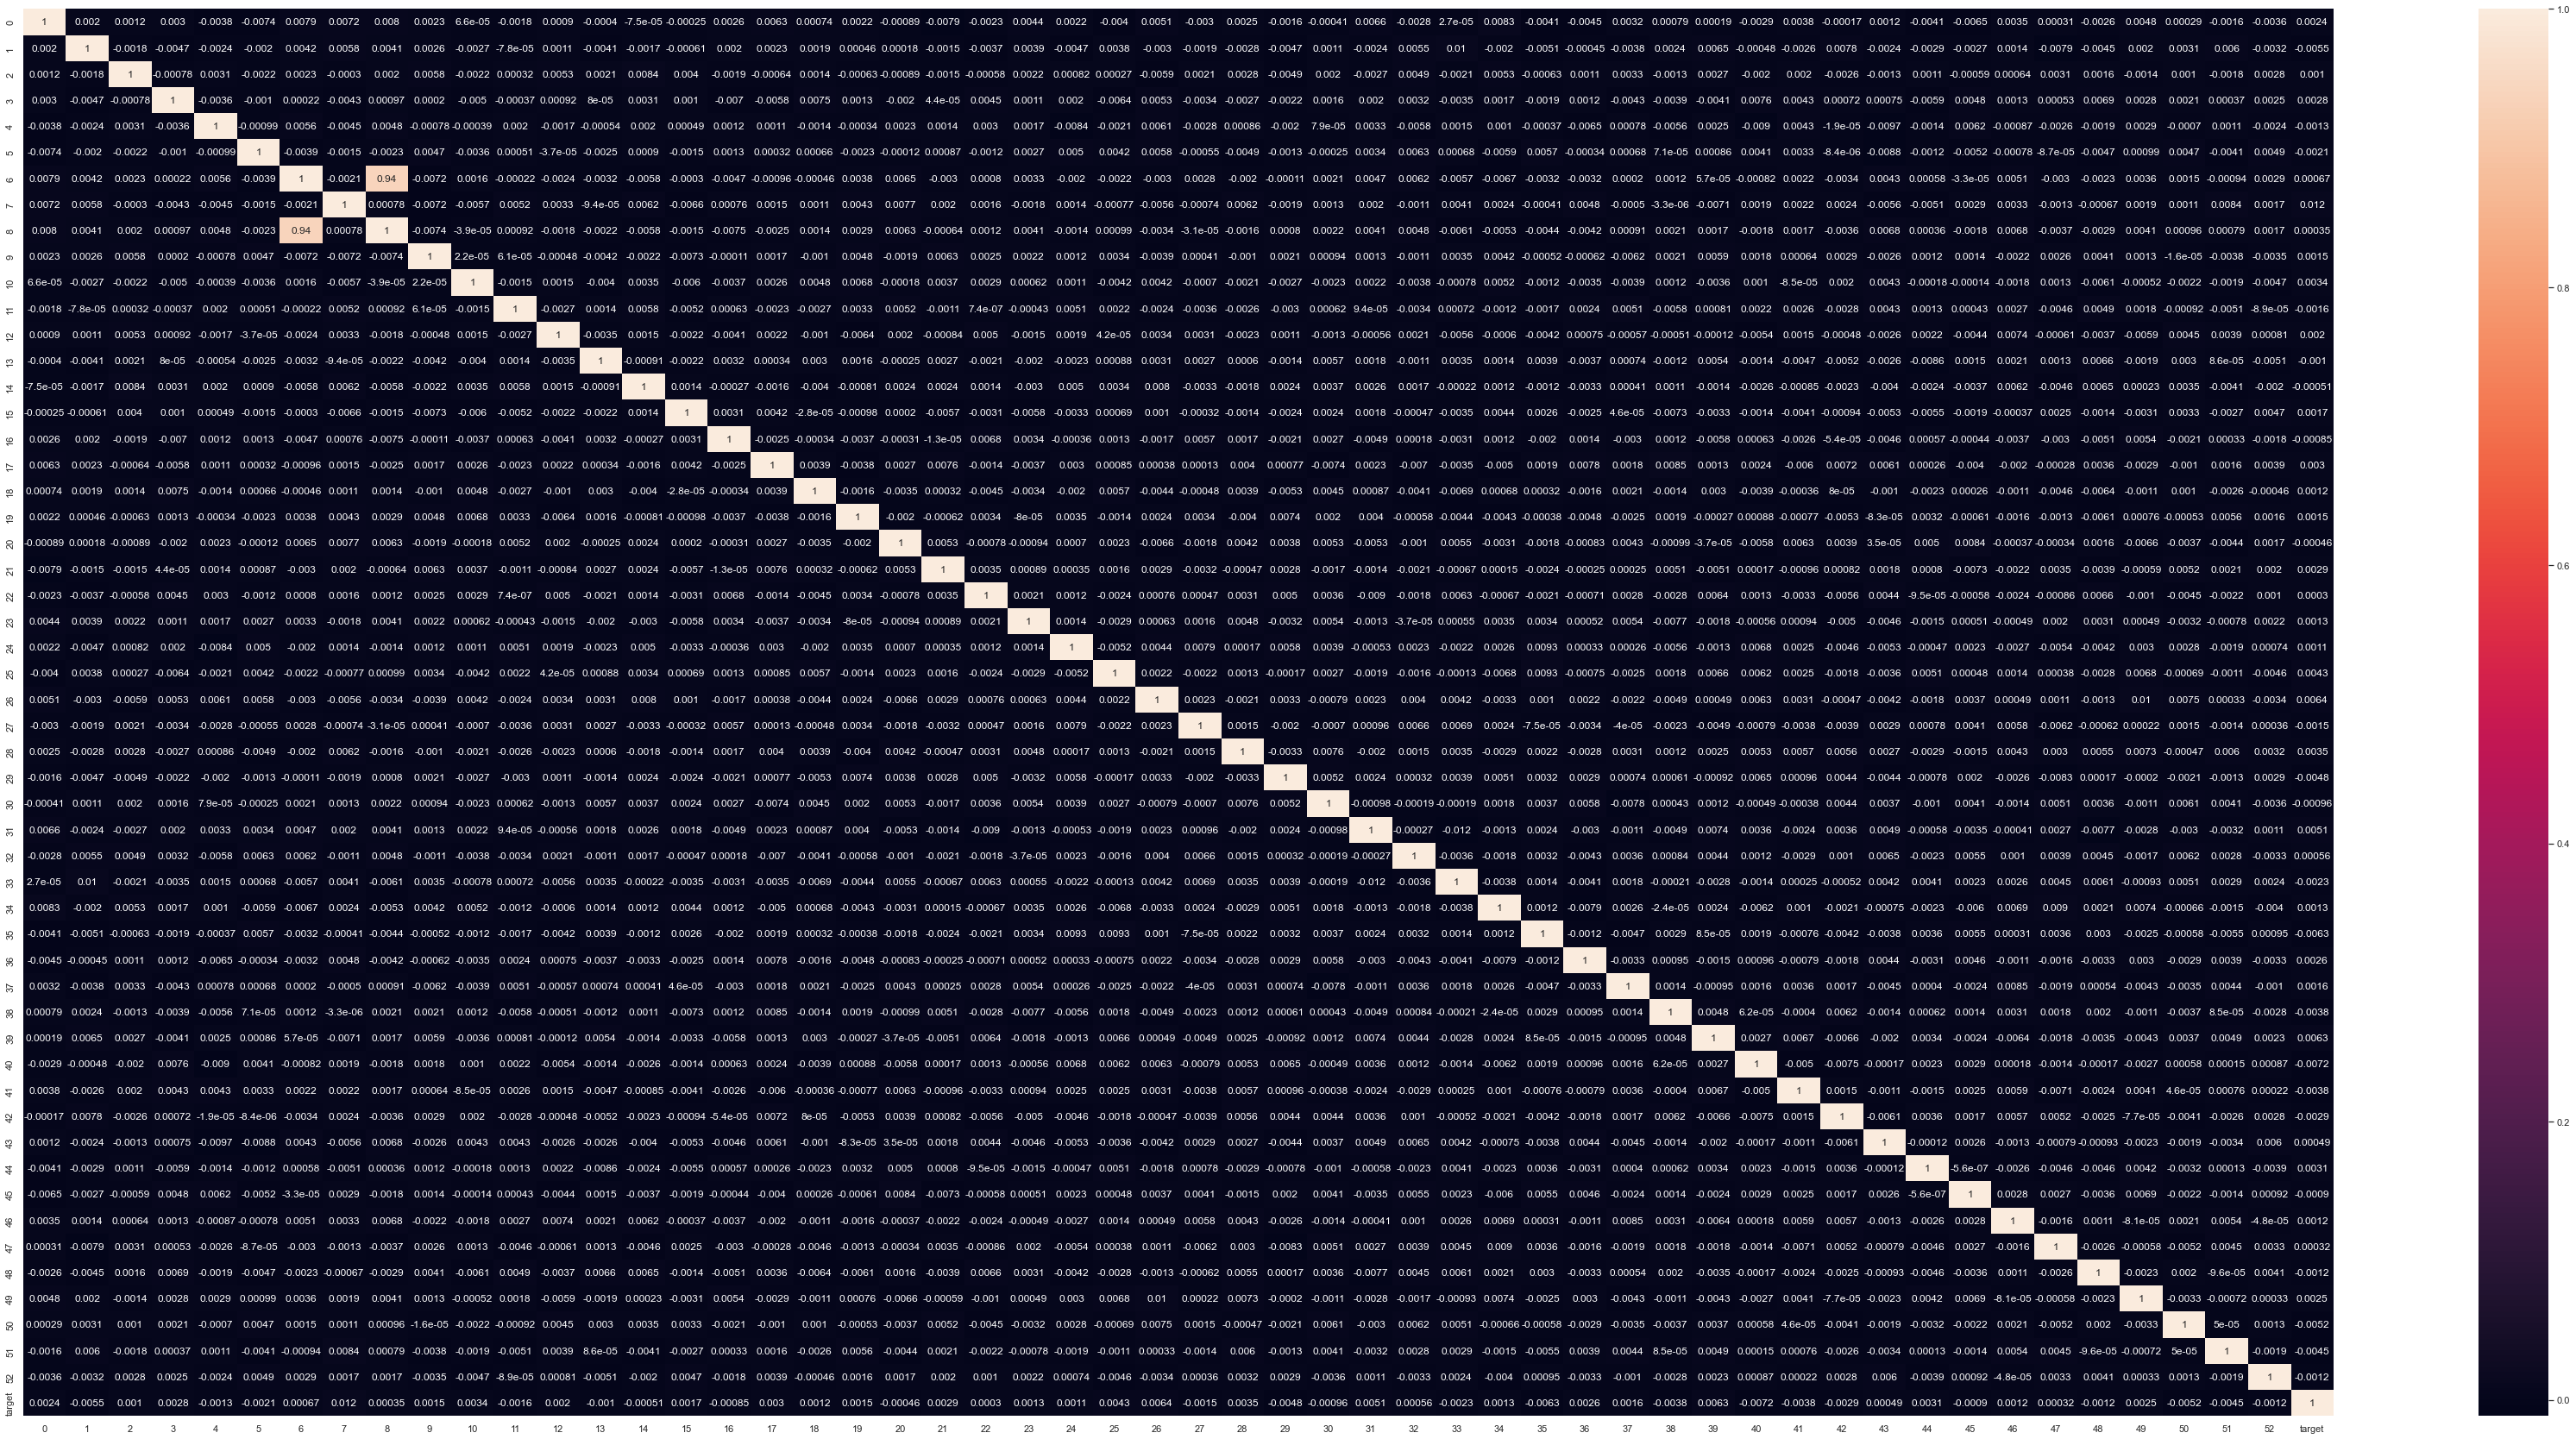

In [6]:
# Building heatmap
sns.set(rc = {'figure.figsize':(60, 30)})
sns.heatmap(train_data.corr(), annot = True)

After building the heatmap of the training data, we can see, that we have poorly correlated features to our target. The only good correlation we have is between features with indexes 6 and 8. Let`s take a better view of correlation values.

In [7]:
# Correlation between features an target in descending order
corr = train_data.corr()['target'][:-1]
top_features = corr.sort_values(ascending = False)
print("{} correlated values : \n{}".format(len(top_features), top_features))

53 correlated values : 
7     0.012103
26    0.006370
39    0.006283
31    0.005077
25    0.004276
28    0.003451
10    0.003396
44    0.003092
17    0.002953
21    0.002874
3     0.002807
36    0.002624
49    0.002473
0     0.002427
12    0.002016
15    0.001653
37    0.001642
19    0.001520
9     0.001504
34    0.001331
23    0.001280
18    0.001197
46    0.001160
24    0.001070
2     0.001003
6     0.000666
32    0.000561
43    0.000489
8     0.000347
47    0.000319
22    0.000304
20   -0.000456
14   -0.000513
16   -0.000853
45   -0.000903
30   -0.000964
13   -0.001009
48   -0.001183
52   -0.001203
4    -0.001300
27   -0.001459
11   -0.001566
5    -0.002125
33   -0.002301
42   -0.002876
41   -0.003770
38   -0.003845
51   -0.004507
29   -0.004785
50   -0.005243
1    -0.005545
35   -0.006267
40   -0.007216
Name: target, dtype: float64


The biggest correlation value we have is 0.012103.

In [8]:
# Split the data into training(80%) and validation(20%) sets
X = train_data.drop('target', axis = 1)
y = train_data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

I was testing a few different regression models but stopped on the Random Forest Regression because it showed the best result.

In [9]:
# Train a random forest regression model on the training data
RF = RandomForestRegressor(n_estimators = 100, random_state = 42)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Evaluate the model's performance on the validation set (RMSE)
y_pred = RF.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE on validation set: {rmse:.5f}')

RMSE on validation set: 0.00381


In [11]:
# Load the test data
test_data = pd.read_csv('internship_hidden_test.csv')

In [12]:
# Make predictions on the test data using the trained model
test_predictions = RF.predict(test_data)

In [14]:
# Save the predictions to a CSV file
predictions_df = pd.DataFrame({'id': range(len(test_predictions)), 'target': test_predictions})
predictions_df.to_csv('model_predictions.csv', index = False)